Study Hours    0
Attendance     0
Pass           0
dtype: int64
       Study Hours  Attendance        Pass
count   100.000000  100.000000  100.000000
mean      4.727938   76.404088    0.620000
std       2.897540   13.905149    0.487832
min       0.046955   50.585704    0.000000
25%       2.058032   64.779856    0.000000
50%       4.674810   78.762065    1.000000
75%       6.844833   86.501171    1.000000
max       9.883738   99.942350    1.000000


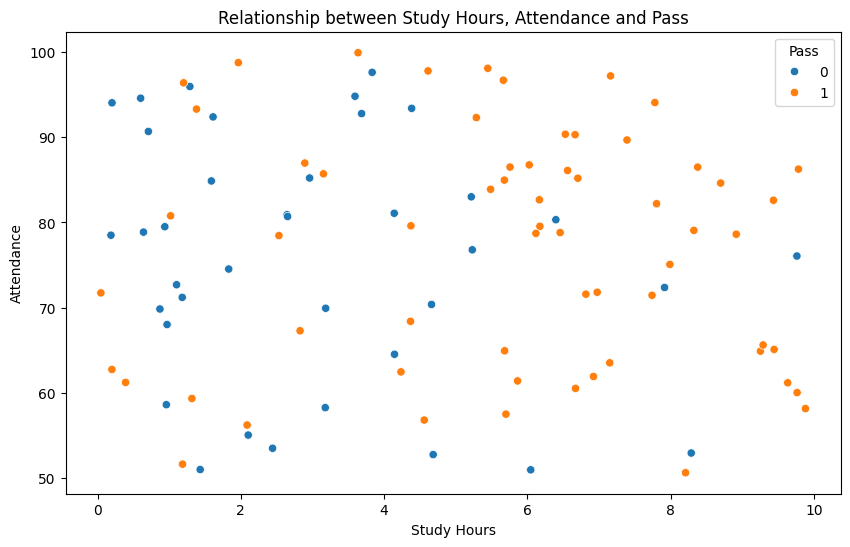

Accuracy: 0.65
Confusion Matrix:
[[ 2  4]
 [ 3 11]]


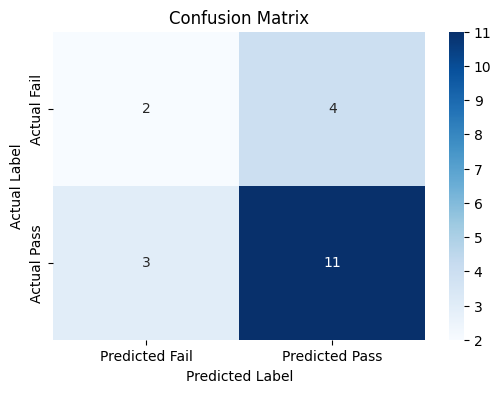

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Dataset Creation
np.random.seed(0)  # for reproducibility
n_samples = 100
study_hours = np.random.uniform(0, 10, n_samples)
attendance = np.random.uniform(50, 100, n_samples)
pass_prob = 1 / (1 + np.exp(-(0.5 * study_hours + 0.02 * attendance - 3))) # Logistic Function
passes = np.random.binomial(1, pass_prob, n_samples)
df = pd.DataFrame({'Study Hours': study_hours, 'Attendance': attendance, 'Pass': passes})

# 2. Data Exploration
print(df.isnull().sum())  # Check for missing values
print(df.describe()) # Summary Statistics
# Visualize the relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Study Hours', y='Attendance', hue='Pass', data=df)
plt.title("Relationship between Study Hours, Attendance and Pass")
plt.show()

# 3. Model Training
X = df[['Study Hours', 'Attendance']]
y = df['Pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Visualization of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Fail', 'Predicted Pass'],
            yticklabels=['Actual Fail', 'Actual Pass'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

